In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import disk_size, head, direction, random_request
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

In [29]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []






for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRunning SCAN algorithm for {size} requests:")
    scan_avg, scan_worst = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)

    

    print(f"\nRunning C-SCAN algorithm for {size} requests:")
    cscan_avg, cscan_worst = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)



    print(f"\nRunning C-LOOK algorithm for {size} requests:")
    clook_avg, clook_worst = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)



Running SCAN algorithm for 10 requests:
Total number of seek operations = 247
Average seek time = 22.454545454545453
Worst-case seek time = 131
Seek Sequence is
25
5
0
131
133
139
182
194
194
197
197

Running C-SCAN algorithm for 10 requests:
Total number of seek operations = 373
Average seek time = 31.083333333333332
Worst-case seek time = 199
Seek Sequence is
131
133
139
182
194
194
197
197
199
0
5
25

Running C-LOOK algorithm for 10 requests:
Total number of seek operations = 359
Average seek time = 35.9
Worst-case seek time = 192
Seek Sequence is
131
133
139
182
194
194
197
197
5
25

Running SCAN algorithm for 20 requests:
Total number of seek operations = 231
Average seek time = 11.0
Worst-case seek time = 52
Seek Sequence is
41
36
25
19
13
8
0
52
55
67
70
70
74
115
119
136
139
169
174
180
181

Running C-SCAN algorithm for 20 requests:
Total number of seek operations = 389
Average seek time = 17.681818181818183
Worst-case seek time = 199
Seek Sequence is
52
55
67
70
70
74
115
119

In [30]:
print("Average Seek Time\n")
print("SCAN   ", avg_seek_time_SCAN)
print("CSCAN  ", avg_seek_time_CSCAN)
print("CLOOK  ", avg_seek_time_CLOOK)

print("\nWorst Seek Time\n")
print("SCAN   ", worst_seek_time_SCAN)
print("CSCAN  ", worst_seek_time_CSCAN)
print("CLOOK  ", worst_seek_time_CLOOK)


Average Seek Time

SCAN    [22.454545454545453, 11.0, 4.803921568627451, 2.474747474747475]
CSCAN   [31.083333333333332, 17.681818181818183, 7.615384615384615, 3.94]
CLOOK   [35.9, 16.85, 7.48, 3.836734693877551]

Worst Seek Time

SCAN    [131, 52, 52, 55]
CSCAN   [199, 199, 199, 199]
CLOOK   [192, 173, 188, 190]


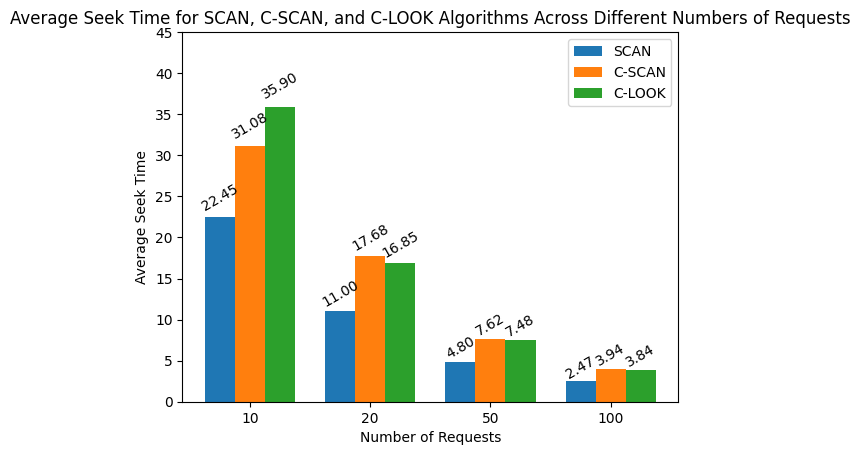

In [36]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation=30)

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

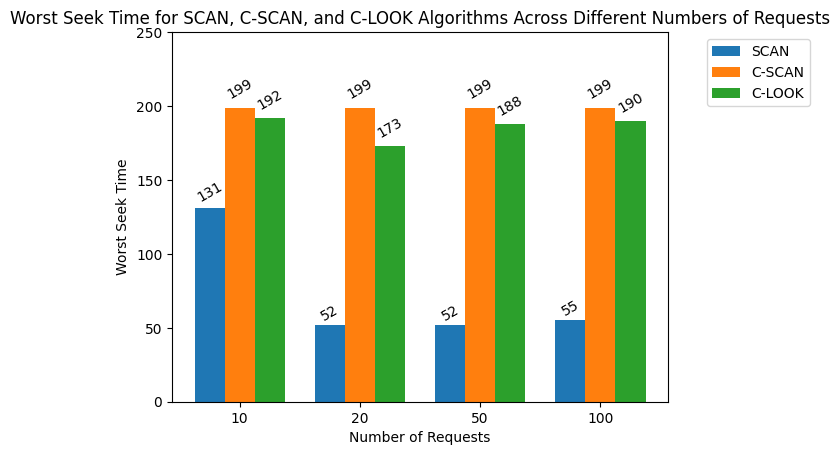

In [37]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)


# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# Set the y-axis limit
ax.set_ylim(0, 250)

def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.f' % int(height),
                ha='center', va='bottom', rotation=30)


# Call function to add label
autolabel2(rects1)
autolabel2(rects2)
autolabel2(rects3)


plt.show()